In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

nSG = pd.read_csv("../DATASETS/air-pollutant-nitrogen-dioxide.csv", on_bad_lines='skip', index_col = 0)
oilW = pd.read_csv("../DATASETS/oil-consumption-by-country.csv", on_bad_lines='skip')
plasticW = pd.read_csv("../DATASETS/plastic-waste-per-capita.csv", on_bad_lines='skip')
nW = pd.read_csv("../DATASETS/nitrous-oxide-emissions.csv")
oilSG = pd.read_csv("../DATASETS/total-oil-consumption-by-sector-2009-to-2019.csv", on_bad_lines='skip')

Firstly, I would like to cleanse the null values. I filled it in with values I felt made the most sense, such as 0s for times. However, I did not replace any values in datasets where there were no null values. This is the data wrangling and extracting data from the data sets given.

In [52]:
count = nSG.isnull().sum()

print(nSG.nunique())
nSG['Sector'] = 'Overall'
print(count)
print(nSG.head())
print(nSG.isna().sum())

nSG.to_csv('../DATASETS/sg-no-CLEANSED.csv')
print(nSG)

nitrogen_dioxide_mean    8
dtype: int64
nitrogen_dioxide_mean    0
dtype: int64
      nitrogen_dioxide_mean   Sector
year                                
2000                     30  Overall
2001                     26  Overall
2002                     27  Overall
2003                     24  Overall
2004                     26  Overall
nitrogen_dioxide_mean    0
Sector                   0
dtype: int64
      nitrogen_dioxide_mean   Sector
year                                
2000                     30  Overall
2001                     26  Overall
2002                     27  Overall
2003                     24  Overall
2004                     26  Overall
2005                     25  Overall
2006                     24  Overall
2007                     22  Overall
2008                     22  Overall
2009                     22  Overall
2010                     23  Overall
2011                     25  Overall
2012                     25  Overall
2013                     25  Overall
20

In [53]:
count = oilSG.isnull().sum()

print(oilSG.nunique())
print(count)
print(oilSG)

print(oilSG.isna().sum())
# oilSG["oil_consump_ktoe"] = oilSG["oil_consump_ktoe"].replace("-", 0)
print(oilSG[oilSG['oil_consump_ktoe'] == '-'])
print(oilSG)

year                11
sector               6
oil_consump_ktoe    56
dtype: int64
year                0
sector              0
oil_consump_ktoe    0
dtype: int64
    year                         sector oil_consump_ktoe
0   2009                        Overall         6,474.80
1   2009             Industrial-related         4,177.70
2   2009  Commerce and Services-related             78.5
3   2009              Transport-related         2,193.30
4   2009                     Households             25.3
..   ...                            ...              ...
61  2019             Industrial-related           7611.1
62  2019  Commerce and Services-related             70.4
63  2019              Transport-related           2320.1
64  2019                     Households             23.5
65  2019                         Others                0

[66 rows x 3 columns]
year                0
sector              0
oil_consump_ktoe    0
dtype: int64
    year  sector oil_consump_ktoe
5   2009  Others   

In [54]:
count = plasticW.isnull().sum()

print(plasticW.nunique())
print(plasticW.head())
print(plasticW.isna().sum())
plasticW.set_index('Year', inplace=True)
plasticW = plasticW.drop(columns=['Code'], axis=1)
plasticW['Sector'] = 'Overall'
print(count)

plasticW.to_csv('../DATASETS/World-Plastic-CLEANSED.csv')

Entity                                      186
Code                                        186
Year                                          1
Per capita plastic waste (kg/person/day)     99
dtype: int64
                Entity Code  Year  Per capita plastic waste (kg/person/day)
0              Albania  ALB  2010                                     0.069
1              Algeria  DZA  2010                                     0.144
2               Angola  AGO  2010                                     0.062
3             Anguilla  AIA  2010                                     0.252
4  Antigua and Barbuda  ATG  2010                                     0.660
Entity                                      0
Code                                        0
Year                                        0
Per capita plastic waste (kg/person/day)    0
dtype: int64
Entity                                      0
Code                                        0
Year                                        0
Per 

In [55]:
count = nW.isnull().sum()

print(nW.nunique())
count = nW.isnull().sum()
nW = nW.drop(columns=['Code'], axis=1)
nW.set_index('Year', inplace=True)
nW['Sector'] = 'Overall'

print(nW)
print(count)

nW.to_csv('../DATASETS/World_NitrousOxide-CLEANSED.csv')


Entity                   205
Code                     194
Year                      30
Total including LUCF    2491
dtype: int64
           Entity  Total including LUCF   Sector
Year                                            
1990  Afghanistan          2.840000e+06  Overall
1991  Afghanistan          2.930000e+06  Overall
1992  Afghanistan          2.890000e+06  Overall
1993  Afghanistan          2.930000e+06  Overall
1994  Afghanistan          2.760000e+06  Overall
...           ...                   ...      ...
2015     Zimbabwe          5.550000e+06  Overall
2016     Zimbabwe          5.100000e+06  Overall
2017     Zimbabwe          5.240000e+06  Overall
2018     Zimbabwe          5.430000e+06  Overall
2019     Zimbabwe          5.500000e+06  Overall

[6150 rows x 3 columns]
Entity                    0
Code                    330
Year                      0
Total including LUCF      0
dtype: int64


For this dataset specifically, I would like to convert the oil consumption to KTOE(kilo tonnes of oil equivalent), so that I am able to plot it against the other dataset, which does not use Terawatt-hours. I also dropped the code as there were too many null values.

In [56]:
print(oilW.nunique())
oilW = oilW.drop(columns=['Code'], axis=1)
count = oilW.isnull().sum()
oilW.set_index('Year', inplace=True)
print(count)
print(oilW)

oilW['Sector'] = 'Overall'

oilW["Oil Consumption - KTOE"] = oilW["Oil Consumption - TWh"] / 0.1163
oilW = oilW.drop(columns=['Oil Consumption - TWh'], axis=1)

oilW.to_csv('../DATASETS/World-Oil-CLEANSED.csv')

Entity                    104
Code                       81
Year                       57
Oil Consumption - TWh    5549
dtype: int64
Entity                   0
Year                     0
Oil Consumption - TWh    0
dtype: int64
      Entity  Oil Consumption - TWh
Year                               
1965  Africa              341.26276
1966  Africa              369.48657
1967  Africa              368.12524
1968  Africa              389.19986
1969  Africa              396.92285
...      ...                    ...
2017   World            52515.54300
2018   World            53250.62000
2019   World            53368.63000
2020   World            48380.71000
2021   World            51170.47300

[5610 rows x 2 columns]


Next, I would like to find the different outliers in the datasets. Using boxplots, I am able to see whether there are any special data that may stick out.

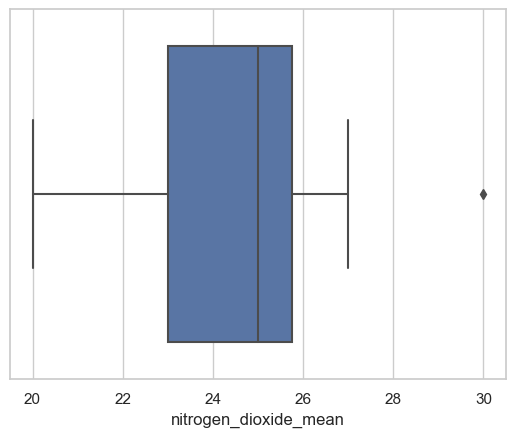

In [57]:
sns.set(style="whitegrid")

sns.boxplot(x = nSG["nitrogen_dioxide_mean"])
plt.show()

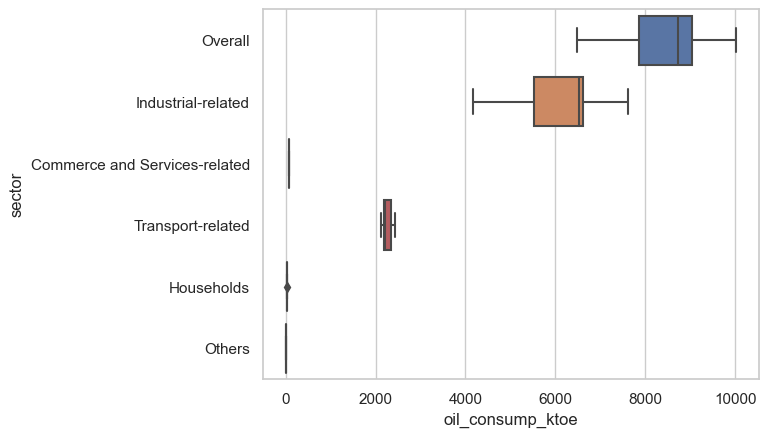

In [58]:
oilSG["oil_consump_ktoe"] = oilSG["oil_consump_ktoe"].replace("-", 0)
oilSG["oil_consump_ktoe"] = oilSG["oil_consump_ktoe"].str.replace(',', '').astype(float)
oilSG["oil_consump_ktoe"] = pd.to_numeric(oilSG["oil_consump_ktoe"])

sns.boxplot(y = oilSG["sector"],x = oilSG["oil_consump_ktoe"])

Q1 = oilSG['oil_consump_ktoe'].quantile(0.25)
Q3 = oilSG['oil_consump_ktoe'].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out any data points that fall outside these bounds, and only keep the inliers
filtered_data = oilSG[(oilSG['oil_consump_ktoe'] > lower_bound) & (oilSG['oil_consump_ktoe'] < upper_bound)]

# Plot the boxplot of the filtered data
# sns.boxplot(x = filtered_data['oil_consump_ktoe'])


plt.show()

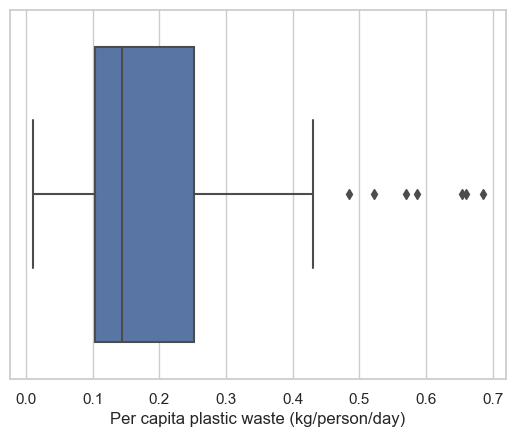

In [59]:
sns.boxplot(x = plasticW["Per capita plastic waste (kg/person/day)"])
plt.show()

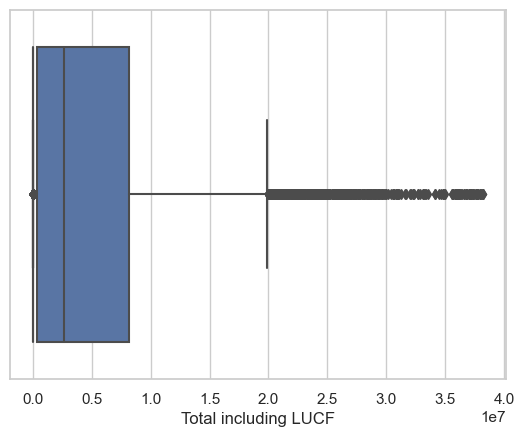

In [60]:
sns.boxplot(x = nW["Total including LUCF"]/100000000)

Q1 = nW["Total including LUCF"].quantile(0.25)
Q3 = nW["Total including LUCF"].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out any data points that fall outside these bounds, and only keep the inliers
filtered_data = nW[(nW["Total including LUCF"] > lower_bound) & (nW["Total including LUCF"] < upper_bound)]

# Plot the boxplot of the filtered data
sns.boxplot(x = filtered_data['Total including LUCF'])

plt.show()

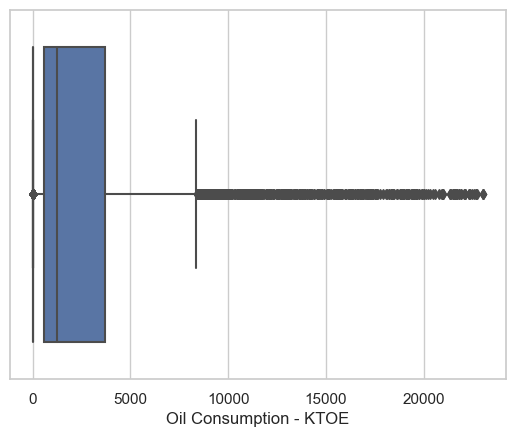

In [61]:
sns.boxplot(x = oilW["Oil Consumption - KTOE"]/10000)

Q1 = oilW["Oil Consumption - KTOE"].quantile(0.25)
Q3 = oilW["Oil Consumption - KTOE"].quantile(0.75)

# Compute the IQR
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out any data points that fall outside these bounds, and only keep the inliers
filtered_data = oilW[(oilW["Oil Consumption - KTOE"] >= lower_bound) & (oilW["Oil Consumption - KTOE"] <= upper_bound)]

# Plot the boxplot of the filtered data
sns.boxplot(x = filtered_data['Oil Consumption - KTOE'])

plt.show()

    year  nitrogen_dioxide_mean   Sector  outlier
0   2000                     30  Overall       -1
2   2002                     27  Overall       -1
20  2020                     20  Overall       -1


c:\Users\Fitri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


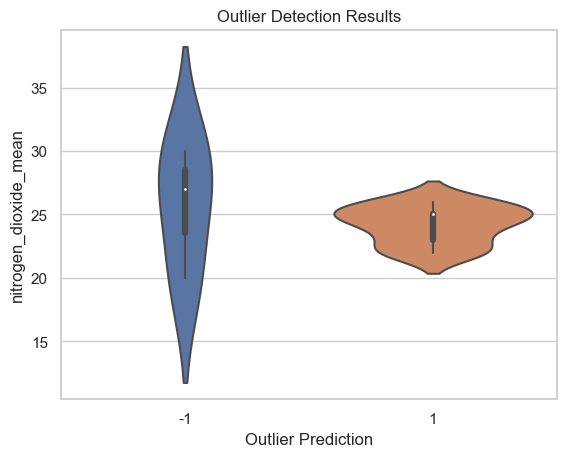

In [62]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load the dataset into a pandas dataframe
df = pd.read_csv("../DATASETS/sg-no-CLEANSED.csv")

target_col = "nitrogen_dioxide_mean"

model = IsolationForest(contamination=0.1)

# Fit the model to the target column
model.fit(df[[target_col]])
outlier_predictions = model.predict(df[[target_col]])

# Add the outlier predictions to the original dataframe
df["outlier"] = outlier_predictions

# Show the records where the outlier prediction is -1
print(df.loc[df["outlier"] == -1])

import seaborn as sns
# sns.displot(oilW["nitrogen_dioxide_mean"], bins=10, kde=False)

# Plot a violin plot of the target column
sns.violinplot(x=df["outlier"], y=df[target_col])

# Add labels and title to the plot
plt.xlabel("Outlier Prediction")
plt.ylabel("nitrogen_dioxide_mean")
plt.title("Outlier Detection Results")

# Show the plot
plt.show()
